## 介绍

- 降维技术(降到二维展示)
    1. PCA/KPCA
    2. LDA/KLDA

- 聚类算法
    1. FCM

- 分类算法
    1. SVM
    2. LR
    3. NN(MLP)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_table('breast-cancer.txt',sep=',', na_values=['?'])
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
data.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
data.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

### 数据预处理

In [7]:
data['Class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [8]:
# 两类-可以直接0-1
data['Class'] = data['Class'].apply(lambda x:0 if x=='no-recurrence-events' else 1)

In [9]:
data['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [10]:
# 多类别、但有比较关系，可以用递增index
age_idx = {'20-29':1, '30-39':2, '40-49':3, '50-59':4, '60-69':5, '70-79':6}
data['age'] = data['age'].apply(lambda x:age_idx[x])

In [11]:
data['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [12]:
# 多类、无比较关系、使用哑变量
data = pd.concat([data, pd.get_dummies(data['menopause'], prefix = 'menopause_')],axis=1) 
data.drop('menopause', axis=1, inplace=True)
data.head()

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,menopause__ge40,menopause__lt40,menopause__premeno
0,0,2,30-34,0-2,no,3,left,left_low,no,0,0,1
1,0,3,20-24,0-2,no,2,right,right_up,no,0,0,1
2,0,3,20-24,0-2,no,2,left,left_low,no,0,0,1
3,0,5,15-19,0-2,no,2,right,left_up,no,1,0,0
4,0,3,0-4,0-2,no,2,right,right_low,no,0,0,1


In [13]:
data['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [14]:
# 多类别、但有比较关系，可以用递增index
tumor_list = ['0-4', '5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
tumor_idx = dict(zip(tumor_list, range(len(tumor_list))))
data['tumor-size'] = data['tumor-size'].apply(lambda x:tumor_idx[x])

In [15]:
data['inv-nodes'].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [16]:
# 多类别、但有比较关系，可以用递增index
inv_list = ['0-2','3-5','6-8','9-11','12-14','15-17','17-20','21-23','24-26']
inv_idx = dict(zip(inv_list, range(len(inv_list))))
data['inv-nodes'] = data['inv-nodes'].apply(lambda x:inv_idx[x])

In [17]:
data.head()

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,menopause__ge40,menopause__lt40,menopause__premeno
0,0,2,6,0,no,3,left,left_low,no,0,0,1
1,0,3,4,0,no,2,right,right_up,no,0,0,1
2,0,3,4,0,no,2,left,left_low,no,0,0,1
3,0,5,3,0,no,2,right,left_up,no,1,0,0
4,0,3,0,0,no,2,right,right_low,no,0,0,1


In [18]:
data['node-caps'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
# 
data['node-caps'] = data['node-caps'].apply(lambda x:0 if x=='no' else 1)
data.head()

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,menopause__ge40,menopause__lt40,menopause__premeno
0,0,2,6,0,0,3,left,left_low,no,0,0,1
1,0,3,4,0,0,2,right,right_up,no,0,0,1
2,0,3,4,0,0,2,left,left_low,no,0,0,1
3,0,5,3,0,0,2,right,left_up,no,1,0,0
4,0,3,0,0,0,2,right,right_low,no,0,0,1


In [20]:
print(data['breast'].unique())
print(data['breast-quad'].unique())

['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central']


In [21]:
data['breast'] = data['breast'].apply(lambda x:0 if x=='left' else 1)

data = pd.concat([data, pd.get_dummies(data['breast-quad'], prefix = 'breast-quad_')],axis=1) 
data.drop('breast-quad', axis=1, inplace=True)
data.head()

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,menopause__ge40,menopause__lt40,menopause__premeno,breast-quad__central,breast-quad__left_low,breast-quad__left_up,breast-quad__right_low,breast-quad__right_up
0,0,2,6,0,0,3,0,no,0,0,1,0,1,0,0,0
1,0,3,4,0,0,2,1,no,0,0,1,0,0,0,0,1
2,0,3,4,0,0,2,0,no,0,0,1,0,1,0,0,0
3,0,5,3,0,0,2,1,no,1,0,0,0,0,1,0,0
4,0,3,0,0,0,2,1,no,0,0,1,0,0,0,1,0


In [22]:
data['irradiat'] = data['irradiat'].apply(lambda x:0 if x=='no' else 1)

### 数据降维

In [23]:
X, y = data.drop('Class', axis=1), data['Class']

In [24]:
# 
def reduction(func, X, y):
    func.fit(X)
    new_X = func.transform(X)
    target = ['no', 'yes']
    colors = ['red', 'blue']
    for i in range(2):
        plt.scatter(
                    new_X[y==i, 0],
                    new_X[y==i, 1],
                    c = colors[i],
                    label = target[i])
    plt.legend()
    return new_X

#### PCA

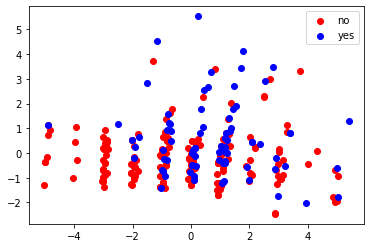

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_X = reduction(pca, X, y)

#### KPCA

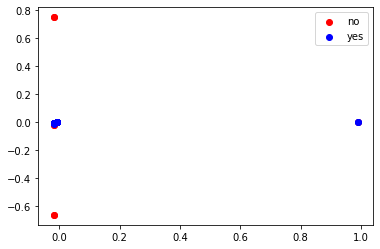

In [26]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

kpca_X = reduction(kpca, X, y)

#### LDA（只能降维至类别数量-1）

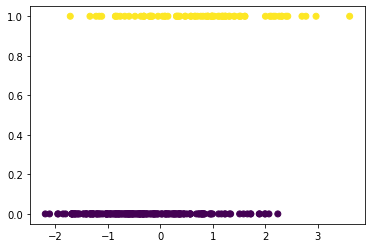

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(X,y)
lda_X = lda.transform(X)
plt.scatter(lda_X[:, 0], y,marker='o',c=y)
plt.show()

In [28]:
!pip install kfda

#### KLDA(Kernel Fisher discriminant analysis)

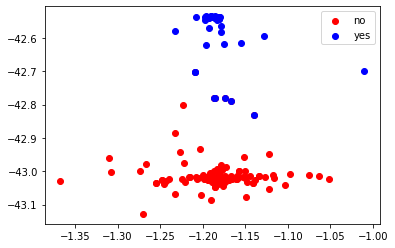

In [29]:
from kfda import Kfda
klda = Kfda(kernel='rbf', n_components=2)

klda.fit(X,y)
klda_X = klda.transform(X)
target = ['no', 'yes']
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(
                klda_X[y==i, 0],
                klda_X[y==i, 1],
                c = colors[i],
                label = target[i])
plt.legend()

## 分类+聚类算法

In [30]:
print(pca_X.shape)
print(kpca_X.shape)
print(lda_X.shape) # LDA限制只能降到类别-1
print(klda_X.shape)
print(y.shape)

(277, 2)
(277, 2)
(277, 1)
(277, 2)
(277,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [32]:
def train(model, X, y, test_size=0.2):
    # 划分训练集、测试集
    train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=test_size)
    # 数据规范化
    ss = StandardScaler()
    train_X = ss.fit_transform(train_X)
    test_X = ss.transform(test_X)
    
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    print("model name: {}\n精确率: {}".format(model.__class__.__name__ , precision_score(prediction, test_y)))
    print('准确率: ', accuracy_score(prediction, test_y))
    print('召回率: ', recall_score(prediction, test_y))
    print('F1: ', f1_score(prediction, test_y))
    
    # Plot
    x1_min, x1_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
    x2_min, x2_max = train_X[:, 1].min()-1, train_X[:, 1].max() + 1
    # 获得绘图边界，这里没有区分训练数据或测试数据，根据实际需求选择即可
    h = (x1_max - x1_min) / 100   
    # h为采样点间隔，可以自己设定
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # 由meshgrid函数生成对应区域内所有点的横纵坐标，xx、yy均为尺寸为(M, N)的二维矩阵，分别对应区域内所有点的横坐标和所有点的纵坐标，同时也是区域内所有样本的第一维特征和第二维特征
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # 由训练好的SVM预测区域内所有样本的结果。由于xx、yy尺寸均为(M,N)，通过.ravel拉平并通过.c_组合，尺寸变为（M*N, 2），相当于M*N个具有两维特征的样本，输出z尺寸为(M*N,)
    z = z.reshape(xx.shape)
    # 将输出尺寸也转变为(M, N)以和横纵坐标对应绘制等高线图
    plt.contourf(xx, yy, z, cmap=plt.cm.ocean, alpha=0.6)
    # 绘制等高线图
    plt.scatter(train_X[train_y == 0, 0], train_X[train_y == 0, 1])
    plt.scatter(train_X[train_y == 1, 0], train_X[train_y == 1, 1])
    # 标记数据中各样本
    plt.title('Visualization of {}'.format(model.__class__.__name__))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

### 分类算法-SVM
#### SVM + (PCA\KPCA\KLDA)

model name: SVC
精确率: 0.13333333333333333
准确率:  0.7678571428571429
召回率:  1.0
F1:  0.23529411764705882


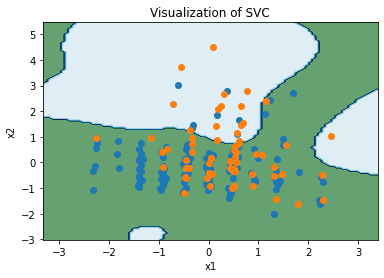

In [33]:
# SVM + PCA
model_svm = SVC(kernel='rbf', C=15.0, gamma='auto')
train(model_svm, pca_X, y)

model name: SVC
精确率: 0.0
准确率:  0.6785714285714286
召回率:  0.0
F1:  0.0


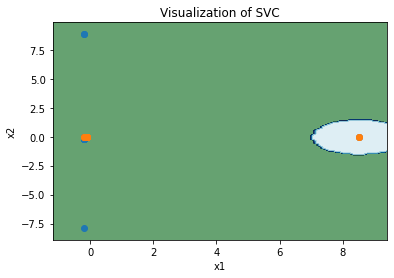

In [34]:
# SVM + KPCA
model_svm = SVC(kernel='rbf', C=15, gamma='auto')
train(model_svm, kpca_X, y)

model name: SVC
精确率: 0.9375
准确率:  0.9821428571428571
召回率:  1.0
F1:  0.967741935483871


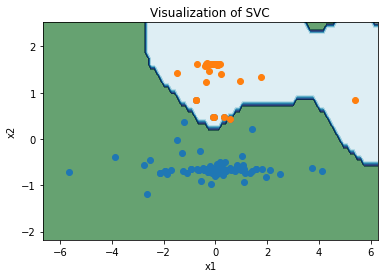

In [35]:
# SVM + KLDA
model_svm = SVC(kernel='rbf', C=15, gamma='auto')
train(model_svm, klda_X, y)

### LR + (PCA\KPCA\KLDA)

model name: LogisticRegression
精确率: 0.4166666666666667
准确率:  0.8392857142857143
召回率:  0.7142857142857143
F1:  0.5263157894736842


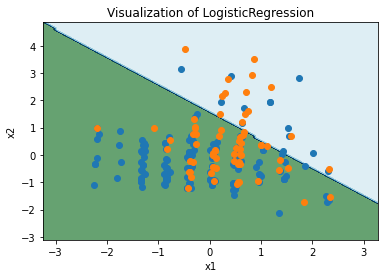

In [36]:
# LR + PCA
model_lr = LogisticRegression()
train(model_lr, pca_X, y)

model name: LogisticRegression
精确率: 0.0
准确率:  0.6071428571428571
召回率:  0.0
F1:  0.0


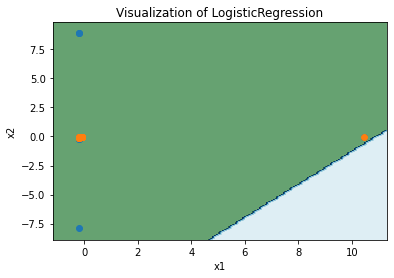

In [37]:
# LR + KPCA
model_lr = LogisticRegression()
train(model_lr, kpca_X, y)

model name: LogisticRegression
精确率: 0.9285714285714286
准确率:  0.9821428571428571
召回率:  1.0
F1:  0.962962962962963


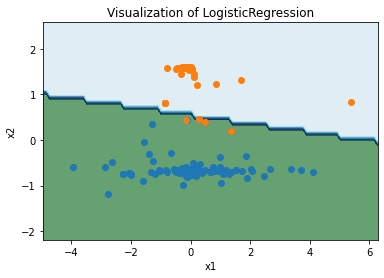

In [38]:
# LR + KLDA
model_lr = LogisticRegression()
train(model_lr, klda_X, y)

### MLP + (PCA\KPCA\KLDA)

model name: MLPClassifier
精确率: 0.35714285714285715
准确率:  0.7142857142857143
召回率:  0.4166666666666667
F1:  0.3846153846153846


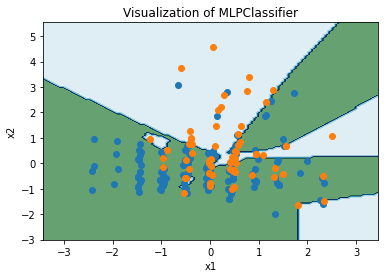

In [39]:
# MLP + PCA
mlp=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,5))
train(mlp, pca_X, y)

model name: MLPClassifier
精确率: 0.0
准确率:  0.7142857142857143
召回率:  0.0
F1:  0.0


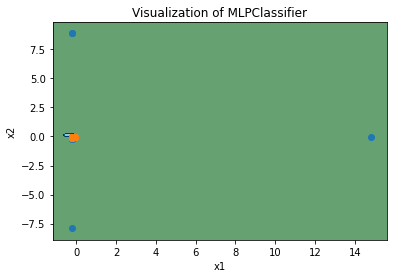

In [40]:
# MLP + kPCA
mlp=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,5))
train(mlp, kpca_X, y)

model name: MLPClassifier
精确率: 0.8571428571428571
准确率:  0.9464285714285714
召回率:  0.9230769230769231
F1:  0.888888888888889


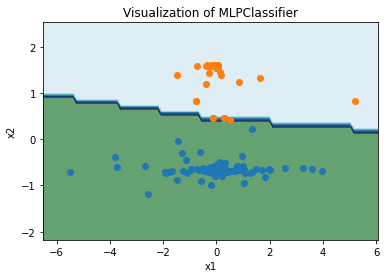

In [41]:
# MLP + KLDA
mlp=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,5))
train(mlp, klda_X, y)

## 聚类方法(FCM)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

#### KNN + (PCA\KPCA\KLDA)

In [43]:
def train_cluster(model, X, y):
    model.fit(X, y)
    prediction = model.predict(X)
    print("精确率: {}".format(precision_score(prediction, y)))
    print('准确率: ', accuracy_score(prediction, y))
    print('召回率: ', recall_score(prediction, y))
    print('F1: ', f1_score(prediction, y))

    target = ['no', 'yes']
    colors = ['red', 'blue']
    for i in range(2):
        plt.scatter(
                    X[y==i, 0],
                    X[y==i, 1],
                    c = colors[i],
                    label = target[i])
    plt.legend()


精确率: 0.43209876543209874
准确率:  0.7472924187725631
召回率:  0.5932203389830508
F1:  0.5


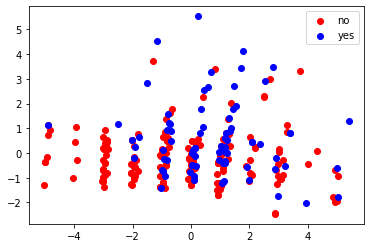

In [44]:
# KNN + PCA
knn = KNeighborsClassifier(n_neighbors = 5)
train_cluster(knn, pca_X, y)

精确率: 0.49382716049382713
准确率:  0.8231046931407943
召回率:  0.8333333333333334
F1:  0.6201550387596899


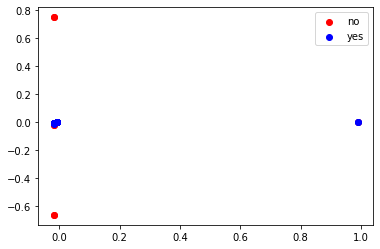

In [45]:
# KNN + KPCA
knn = KNeighborsClassifier(n_neighbors = 5)
train_cluster(knn, kpca_X, y)

精确率: 0.9753086419753086
准确率:  0.9783393501805054
召回率:  0.9518072289156626
F1:  0.9634146341463414


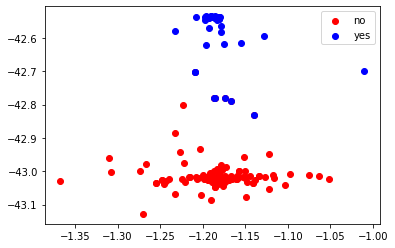

In [46]:
# KNN + KLDA
knn = KNeighborsClassifier(n_neighbors = 5)
train_cluster(knn, klda_X, y)

In [47]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 1.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=de82f6f14888aa6586aace07be45a25baab3fb094820b92ff9798c9711eef61d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


### FCM + (PCA/KPCA/KLDA)

In [48]:
from skfuzzy.cluster import cmeans

In [49]:
def train_fcm(X, y):
    center, u, u0, d, jm, p, fpc = cmeans(X.T, 2, m=2, error=1e-6, maxiter=20)
    prediction = np.argmax(u.T, axis=1)
    plt.scatter(*X.T, c=prediction, alpha = 0.5)
    plt.plot(*center.T, 'ro')
    
    print("精确率: {}".format(precision_score(prediction, y)))
    print('准确率: ', accuracy_score(prediction, y))
    print('召回率: ', recall_score(prediction, y))
    print('F1: ', f1_score(prediction, y))

精确率: 0.25925925925925924
准确率:  0.4187725631768953
召回率:  0.1721311475409836
F1:  0.20689655172413793


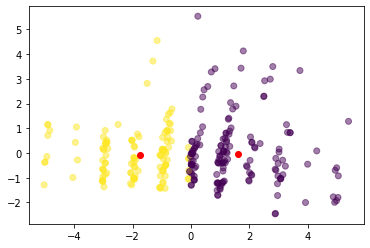

In [50]:
# FCM + pca
train_fcm(pca_X, y)

精确率: 0.9753086419753086
准确率:  0.2888086642599278
召回率:  0.28832116788321166
F1:  0.4450704225352113


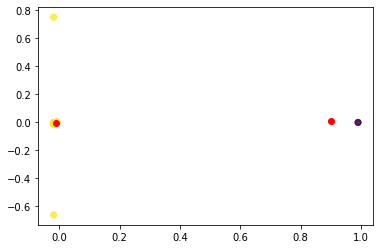

In [56]:
# FCM + kpca
train_fcm(kpca_X, y)

精确率: 0.9753086419753086
准确率:  0.9783393501805054
召回率:  0.9518072289156626
F1:  0.9634146341463414


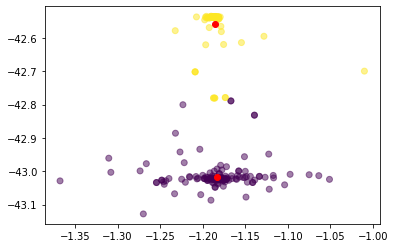

In [52]:
# FCM + klda
train_fcm(klda_X, y)

## 原始数据（SVM v.s. FCM）

In [53]:
# SVM

model_svm = SVC(kernel='rbf', C=15.0, gamma='auto')
# 划分训练集、测试集
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2)
# 数据规范化
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

model_svm.fit(train_X, train_y)
prediction = model_svm.predict(test_X)
print("model name: {}\n精确率: {}".format(model_svm.__class__.__name__ , precision_score(prediction, test_y)))
print('准确率: ', accuracy_score(prediction, test_y))
print('召回率: ', recall_score(prediction, test_y))
print('F1: ', f1_score(prediction, test_y))

model name: SVC
精确率: 0.3333333333333333
准确率:  0.6964285714285714
召回率:  0.4166666666666667
F1:  0.3703703703703704


In [55]:
# FCM

center, u, u0, d, jm, p, fpc = cmeans(X.T, 2, m=2, error=1e-6, maxiter=20)
prediction = np.argmax(u.T, axis=1)


print("精确率: {}".format(precision_score(prediction, y)))
print('准确率: ', accuracy_score(prediction, y))
print('召回率: ', recall_score(prediction, y))
print('F1: ', f1_score(prediction, y))

精确率: 0.7283950617283951
准确率:  0.592057761732852
召回率:  0.3933333333333333
F1:  0.5108225108225108
